In [68]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Download

In [69]:
from sklearn.datasets import fetch_california_housing

# as_frame=True to present the data in the form of dataframe 
data = fetch_california_housing(as_frame=True)
data.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [70]:
a = data.DESCR
print(a)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

### Target & Independent split

In [71]:
Y = data.frame['MedHouseVal']
X = data.frame.drop(columns = ['MedHouseVal'], axis = 1)

#### Normalization

In [72]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
scalled = scale.fit_transform(X,Y)

In [78]:
from sklearn.model_selection import train_test_split

X = scalled[:,0:8]
Y = scalled[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [79]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(14448, 8)
(6192, 8)
(14448,)
(6192,)


## MLP Model

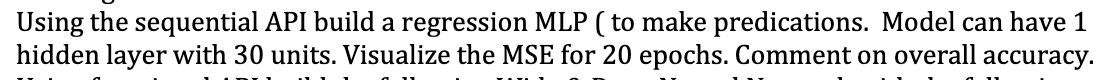

In [80]:
from tensorflow.keras.metrics import MeanSquaredError

model = tf.keras.Sequential([tf.keras.layers.InputLayer(input_shape = 8, name = "InputLayer"), 
                          tf.keras.layers.Dense(30, activation="relu", name = "hiddenlayer1"),
                          tf.keras.layers.Dense(1, activation="relu", name = "outputlayer")
                          ])
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss=tf.keras.metrics.mean_squared_error, optimizer=opt, metrics=[MeanSquaredError(name='mse')])
history = model.fit(X_train, Y_train, epochs=20, validation_split=0.125, batch_size=4)

Epoch 1/20
3161/3161 [==============================] - 10s 3ms/step - loss: 8.6708e-04 - mse: 8.6708e-04 - val_loss: 6.8323e-04 - val_mse: 6.8323e-04
Epoch 2/20
3161/3161 [==============================] - 9s 3ms/step - loss: 8.5634e-05 - mse: 8.5634e-05 - val_loss: 5.6446e-06 - val_mse: 5.6446e-06
Epoch 3/20
3161/3161 [==============================] - 9s 3ms/step - loss: 5.2945e-05 - mse: 5.2945e-05 - val_loss: 2.5679e-06 - val_mse: 2.5679e-06
Epoch 4/20
3161/3161 [==============================] - 9s 3ms/step - loss: 2.9002e-05 - mse: 2.9002e-05 - val_loss: 1.2631e-04 - val_mse: 1.2631e-04
Epoch 5/20
3161/3161 [==============================] - 9s 3ms/step - loss: 1.8900e-05 - mse: 1.8900e-05 - val_loss: 7.6814e-06 - val_mse: 7.6814e-06
Epoch 6/20
3161/3161 [==============================] - 9s 3ms/step - loss: 2.0039e-05 - mse: 2.0039e-05 - val_loss: 2.1683e-05 - val_mse: 2.1683e-05
Epoch 7/20
3161/3161 [==============================] - 9s 3ms/step - loss: 1.7002e-05 - mse: 1.700

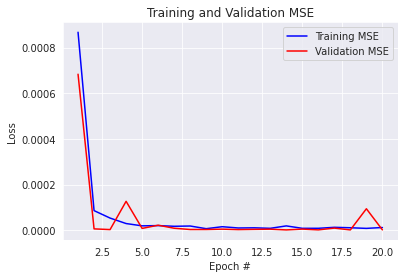

In [81]:
sns.set_style("darkgrid")
train_mse = history.history['mse']
valid_mse = history.history['val_mse']
epochs = range(1, len(valid_mse) + 1)

plt.figure()

#Train and validation loss

plt.plot(epochs, train_mse, 'b', label='Training MSE')
plt.plot(epochs, valid_mse, 'r', label='Validation MSE')
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.title('Training and Validation MSE')
plt.legend()

plt.show()


In [82]:
model.evaluate(X_test, Y_test)

194/194 [==============================] - 0s 2ms/step - loss: 1.9261e-07 - mse: 1.9261e-07


[1.9261428008121584e-07, 1.9261428008121584e-07]

##### Train MSE of 1.1632e-05 and Test MSE of 1.3121e-06, which is good

### Wide and Deep Neural Network

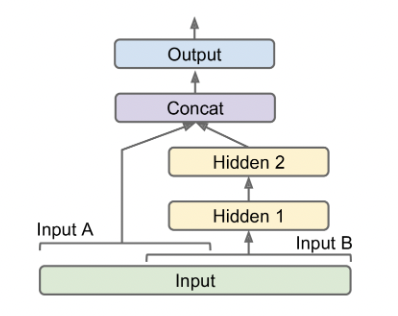

In [88]:
inputA = tf.keras.layers.Input(shape=(5))
inputB = tf.keras.layers.Input(shape=(6))
hidden1 = tf.keras.layers.Dense(30, activation="relu")(inputB)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.Concatenate()([inputA, hidden2])
output = tf.keras.layers.Dense(1, activation="relu")(concat)
model = tf.keras.Model(inputs=[inputA, inputB], outputs=[output])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 30)           210         ['input_4[0][0]']                
                                                                                                  
 input_3 (InputLayer)           [(None, 5)]          0           []                               
                                                                                                  
 dense_4 (Dense)                (None, 30)           930         ['dense_3[0][0]']                
                                                                                            

In [89]:
X_wide_train = X_train[:, 0:5]
X_deep_train = X_train[:, 2:8]

In [91]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss=tf.keras.metrics.mean_squared_error, optimizer=opt, metrics=[MeanSquaredError(name='mse')])
history2 = model.fit((X_wide_train, X_deep_train), Y_train, epochs=20, validation_split=0.3, batch_size=32)

Epoch 1/20
317/317 [==============================] - 3s 7ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 4.6364e-06 - val_mse: 4.6364e-06
Epoch 2/20
317/317 [==============================] - 1s 4ms/step - loss: 5.8147e-06 - mse: 5.8147e-06 - val_loss: 1.1434e-05 - val_mse: 1.1434e-05
Epoch 3/20
317/317 [==============================] - 1s 4ms/step - loss: 4.3273e-06 - mse: 4.3273e-06 - val_loss: 2.9019e-06 - val_mse: 2.9019e-06
Epoch 4/20
317/317 [==============================] - 1s 4ms/step - loss: 1.2773e-06 - mse: 1.2773e-06 - val_loss: 2.5141e-06 - val_mse: 2.5141e-06
Epoch 5/20
317/317 [==============================] - 1s 4ms/step - loss: 1.8655e-06 - mse: 1.8655e-06 - val_loss: 5.8058e-06 - val_mse: 5.8058e-06
Epoch 6/20
317/317 [==============================] - 1s 4ms/step - loss: 3.2284e-06 - mse: 3.2284e-06 - val_loss: 3.6883e-05 - val_mse: 3.6883e-05
Epoch 7/20
317/317 [==============================] - 1s 4ms/step - loss: 1.0411e-05 - mse: 1.0411e-05 - val_loss: 1.863

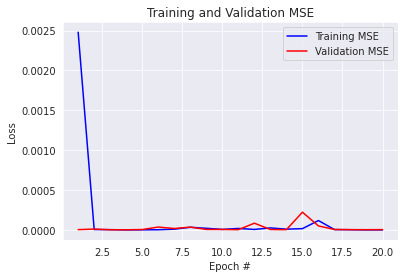

In [92]:
sns.set_style("darkgrid")
train_mse = history2.history['mse']
valid_mse = history2.history['val_mse']
epochs = range(1, len(valid_mse) + 1)

plt.figure()

#Train and validation loss

plt.plot(epochs, train_mse, 'b', label='Training MSE')
plt.plot(epochs, valid_mse, 'r', label='Validation MSE')
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.title('Training and Validation MSE')
plt.legend()

plt.show()


In [93]:
model.evaluate(x = [X_test[:,0:5], X_test[:,2:8]], y = X_test)

194/194 [==============================] - 1s 5ms/step - loss: 0.1789 - mse: 0.1789


[0.17887701094150543, 0.17887701094150543]

Both Wide & Deep Neural Network almost has same MSE 